<a href="https://colab.research.google.com/github/tamisha-dzifa/DSProject2/blob/master/Project_2_Data_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Names: Michael Agyeman-Prempeh & Tamisha Dzifa Segbefia

Project: Looking at whether GDP per capita and/or mean total years of education have a relationship with suicide rates in a country

In [ ]:
import pandas as pd

### Suicide Rates

In [ ]:
import os

if not os.path.exists('suicide-death-rates.csv'):
  !wget https://github.com/tamisha-dzifa/DSProject2/raw/master/suicide-death-rates.csv

In [ ]:
suicide = pd.read_csv('suicide-death-rates.csv')
suicide.head()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


Renaming the last column as `Suicide Rate`.

In [ ]:
suicide.columns = ['Entity', 'Code', 'Year', 'Suicide Rate']
suicide.head()

,Entity,Code,Year,Suicide Rate
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


In [ ]:
suicide.shape

(6468, 4)

In [ ]:
suicide_entity = suicide['Entity']
suicide_entity.value_counts().sort_index()

Afghanistan                   28
Albania                       28
Algeria                       28
American Samoa                28
Andean Latin America          28
                              ..
Western Sub-Saharan Africa    28
World                         28
Yemen                         28
Zambia                        28
Zimbabwe                      28
Name: Entity, Length: 231, dtype: int64

In [ ]:
suicide_entity.isna().sum()

0

In [ ]:
suicide['Suicide Rate'].isna().sum()

0

There are no N/A values which is good.

In [ ]:
s_rate = suicide['Suicide Rate']
s_rate.describe()

count    6468.000000
mean       12.068240
std         8.037739
min         1.526792
25%         6.741737
50%        10.668531
75%        14.742472
max        98.831696
Name: Suicide Rate, dtype: float64

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [ ]:
from empiricaldist import Pmf, Cdf
s_rate_cdf = Cdf.from_seq(s_rate)

In [ ]:
import matplotlib.pyplot as plt

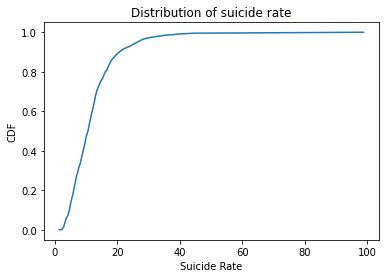

In [ ]:
s_rate_cdf.plot()
plt.xlabel('Suicide Rate');
plt.ylabel('CDF');
plt.title('Distribution of suicide rate');

In [ ]:
q = 30
p = s_rate_cdf(q)
p

array(0.97139765)

From the CDF above, we can say that from the suicide rates presented in the data, about 97% of countries have a suicide rate of 30% or lower.

### GDP Data

In [ ]:
import os

if not os.path.exists('gdp-per-capita-worldbank.csv'):
  !wget https://github.com/tamisha-dzifa/DSProject2/raw/master/gdp-per-capita-worldbank.csv

In [ ]:
gdp = pd.read_csv('gdp-per-capita-worldbank.csv')
gdp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2011 international $)"
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


Renaming the last column as `GDP per capita`.

In [ ]:
gdp.columns = ['Entity', 'Code', 'Year', 'GDP per capita']
gdp.head()

,Entity,Code,Year,GDP per capita
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


In [ ]:
gdp.shape

(6407, 4)

In [ ]:
gdp_entity = gdp['Entity']
gdp_entity.value_counts().sort_index()

Afghanistan            16
Albania                28
Algeria                28
Angola                 28
Antigua and Barbuda    28
                       ..
Vietnam                28
World                  28
Yemen                  27
Zambia                 28
Zimbabwe               28
Name: Entity, Length: 241, dtype: int64

Unlike in the suicide data where each of the enntities had the same number of entries, there are some missing values in this dataset for some countries.

In [ ]:
gdp_entity.isna().sum()

0

In [ ]:
gdp['GDP per capita'].isna().sum()

0

These 'missing' values don't show as N/A but they are still missing as far as the number of data points is concerned.

In [ ]:
gdp_p_c = gdp['GDP per capita']
gdp_p_c.describe()

count      6407.000000
mean      14926.095591
std       17739.754531
min         247.436540
25%        3021.071807
50%        8447.264179
75%       19607.537075
max      135318.754421
Name: GDP per capita, dtype: float64

Here, we realize that there are 6407 entries for GDP and 6468 entries for suicide rate. This is something we will have to look into and decide what to do.

In [ ]:
cdf_gdp = Cdf.from_seq(gdp_p_c)

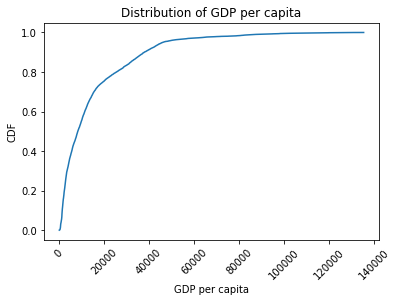

In [ ]:
cdf_gdp.plot()
plt.xlabel('GDP per capita');
plt.ylabel('CDF');
plt.title('Distribution of GDP per capita');
plt.xticks(rotation=45);

In [ ]:
q = 14926  # the mean from the summary statistics
p = cdf_gdp(q)
p

array(0.68487592)

From the CDF above, we can say that from the GDP per capita values presented in the data, about 68% of countries have a GDP per capita of the mean value, $14926 (2011 international dollars), or below.

### Mean years of schooling (long run)

In [ ]:
import os

if not os.path.exists('mean-years-of-schooling-long-run.csv'):
  !wget https://github.com/tamisha-dzifa/DSProject2/raw/master/mean-years-of-schooling-long-run.csv

--2020-11-17 20:03:13--  https://github.com/tamisha-dzifa/DSProject2/raw/master/mean-years-of-schooling-long-run.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/mean-years-of-schooling-long-run.csv [following]
--2020-11-17 20:03:13--  https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/mean-years-of-schooling-long-run.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174763 (171K) [text/plain]
Saving to: ‘mean-years-of-schooling-long-run.csv’

mean-years-of-schoo 100%[===================>] 170.67K  --.-KB/s    in 0.03s   

2020-11-17 20:03:14 (5.29 

In [ ]:
school = pd.read_csv('mean-years-of-schooling-long-run.csv')
school.head()

,Entity,Code,Year,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))"
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


Renaming last column as `Average Total Years of School`

In [ ]:
school.columns = ['Entity', 'Code', 'Year', 'Average Total Years of School']
school.head()

,Entity,Code,Year,Average Total Years of School
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [ ]:
school.shape

(7763, 4)

There are considerably more data points here than there are in the other two data sets. It would probably be worth it to take only the years that are needed.

In [ ]:
school['Entity'].value_counts().sort_index()

Afghanistan    52
Albania        52
Algeria        52
Andorra        18
Angola         19
               ..
Venezuela      52
Vietnam        36
Yemen          52
Zambia         52
Zimbabwe       52
Name: Entity, Length: 193, dtype: int64

In [ ]:
school['Entity'].isna().sum()

0

In [ ]:
school['Average Total Years of School'].isna().sum()

0

As with the previous two data sets, there are no obvious NA values. Still, some entities have fewer entries than others.

In [ ]:
avg_years = school['Average Total Years of School']
avg_years.describe()

count    7763.000000
mean        5.479349
std         3.849849
min         0.000000
25%         2.090000
50%         5.200000
75%         8.700000
max        14.100000
Name: Average Total Years of School, dtype: float64

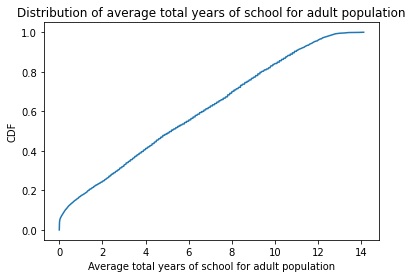

In [ ]:
cdf_avg_years = Cdf.from_seq(avg_years)
cdf_avg_years.plot();
plt.xlabel('Average total years of school for adult population');
plt.ylabel('CDF');
plt.title('Distribution of average total years of school for adult population');

This CDF doesn't look as expected (i.e. a smooth sigmoid curve). Let's try a histogram.

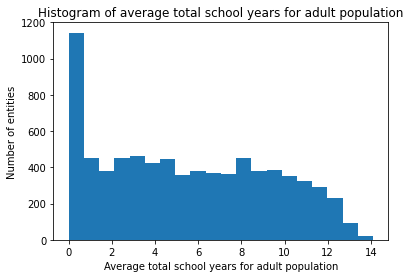

In [ ]:
plt.hist(avg_years, bins=20);
plt.xlabel('Average total school years for adult population');
plt.ylabel('Number of entities');
plt.title('Histogram of average total school years for adult population');

This histogram looks a bit better than the CDF in that we can easily see the mode. However, this should be taken with a grain of salt because it includes multiple entities and their different values over the years.